📊 توضیح کامل ستون‌های دیتاست خرابی ساختمان (زلزله ترکیه)
1️⃣ province

استان محل قرارگیری ساختمان

این ستون نشان می‌دهد هر ساختمان در کدام استان ترکیه واقع شده است (مانند Hatay، Kahramanmaraş، Gaziantep و …).
این ویژگی برای تحلیل مکانی خرابی‌ها و بررسی شدت آسیب در مناطق مختلف بسیار مهم است.

2️⃣ year_built

سال ساخت ساختمان

سال ساخت ساختمان که معمولاً به‌صورت چهاررقمی ذخیره می‌شود.
ساختمان‌های قدیمی‌تر معمولاً فاقد آیین‌نامه‌های جدید لرزه‌ای بوده و آسیب‌پذیری بیشتری دارند.

📌 مثال:

قبل از 2000 → ریسک بالاتر

بعد از 2010 → عملکرد لرزه‌ای بهتر

3️⃣ struct_typ

نوع سیستم سازه‌ای ساختمان

نوع سیستم باربر سازه‌ای که نقش اصلی در مقاومت ساختمان در برابر زلزله دارد.

کد	توضیح
URM	بنایی بدون مسلح
S1	سازه فولادی قاب خمشی
C4	سازه بتن مسلح قاب خمشی
W1	سازه چوبی
PC1	بتن پیش‌ساخته
C1	بتن مسلح ساده
4️⃣ occupancy

نوع کاربری ساختمان

این ستون بیانگر نوع استفاده از ساختمان است که بر تراکم جمعیت، اهمیت سازه و سطح خسارت اثر می‌گذارد.

کد	توضیح فارسی
RES1	مسکونی کم‌تراکم
RES3	مسکونی آپارتمانی
COM1	تجاری کوچک
COM2	تجاری متوسط
COM3	تجاری بزرگ
IND1	صنعتی سبک
IND3	صنعتی سنگین
AGR1	کشاورزی
EDU1	آموزشی
REL1	مذهبی
GOV1	دولتی
5️⃣ soil_type

نوع خاک محل ساختمان

نوع خاک یکی از عوامل کلیدی در تشدید یا کاهش اثر زلزله است.

نوع خاک	توضیح
Soft	خاک نرم (بیشترین تقویت لرزه‌ای)
Medium	خاک متوسط
Hard	خاک سخت (کمترین تقویت لرزه‌ای)
6️⃣ meandamage

میانگین شاخص خرابی ساختمان

یک متغیر عددی نرمال‌شده که شدت آسیب وارده به ساختمان را نشان می‌دهد.
این مقدار مبنای تبدیل به کلاس‌های کیفی خرابی است.

7️⃣ damage_class

کلاس نهایی خرابی ساختمان

بر اساس مقدار meandamage، میزان خرابی ساختمان به‌صورت کیفی دسته‌بندی شده است:

بازه مقدار	کلاس خرابی
کم	Safe (ایمن)
متوسط	High Risk (پرخطر)
زیاد	Collapsed (فروریخته)

این ستون هدف (Target) اصلی در مدل‌های یادگیری ماشین است.


Turkey Earthquake Building Damage Dataset

1️⃣ province

Province where the building is located

This column indicates the Turkish province in which each building is located (e.g., Hatay, Kahramanmaraş, Gaziantep).
It is essential for spatial damage analysis and understanding regional differences in earthquake impact.

2️⃣ year_built

Year of construction

The year when the building was constructed, typically stored as a four-digit value.
Older buildings are generally more vulnerable due to the absence of modern seismic design codes.

📌 Engineering insight:

Built before 2000 → higher seismic risk

Built after 2010 → improved seismic performance

3️⃣ struct_typ

Structural system type

This column describes the primary load-bearing structural system of the building.
It is one of the most critical features influencing seismic vulnerability.

Code	Description
URM	Unreinforced Masonry
S1	Steel Moment Frame
C4	Reinforced Concrete Moment Frame
W1	Wood Frame
PC1	Precast Concrete
C1	Reinforced Concrete (non-moment frame / shear system)
4️⃣ occupancy

Building occupancy (usage type)

Indicates the functional use of the building, affecting population exposure, importance level, and damage consequences.

Code	Description
RES1	Low-rise Residential
RES3	Apartment Residential
COM1	Small Commercial
COM2	Medium Commercial
COM3	Large Commercial
IND1	Light Industrial
IND3	Heavy Industrial
AGR1	Agricultural
EDU1	Educational
REL1	Religious
GOV1	Governmental
5️⃣ soil_type

Soil condition

Represents the soil characteristics at the building site, which significantly affect ground motion amplification during earthquakes.

Type	Description
Soft	Soft soil (high seismic amplification)
Medium	Medium soil
Hard	Hard soil / rock (low amplification)
6️⃣ meandamage

Mean damage index

A normalized numerical indicator representing the average level of structural damage sustained by the building.
This value is used as the basis for categorizing damage severity.

7️⃣ damage_class

Final damage classification

A categorical variable derived from meandamage, representing qualitative damage severity.
This is the target variable for machine learning models.

Damage Level	Description
Safe	No or minor damage
High Risk	Severe damage, unsafe for occupancy
Collapsed	Partial or total structural collapse

In [643]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import cluster
from sklearn import decomposition
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import naive_bayes

import pickle

In [644]:
data = pd.read_csv("building_damage.csv")
data

,Unnamed: 0,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage
0,0,URM,RES1,1946,1.0,5,8.758655,0.13637
1,1,W1,COM1,1946,1.0,5,8.750071,0.13302
2,2,URM,RES1,19830429,1.0,5,8.761617,0.18070
3,3,URM,RES1,1954,1.0,5,8.767489,0.14398
4,4,URM,RES1,19821126,1.0,5,8.764526,0.17911
...,...,...,...,...,...,...,...,...
11087,11766,S1,COM2,20050503,2.0,5,8.783250,0.09335
11088,11767,S1,COM8,20030828,2.0,5,8.720425,0.07537
11089,11768,C4,RES1,20010913,2.0,5,8.882139,0.21389
11090,11769,S1,COM2,19950913,1.0,5,8.909023,0.10686


In [645]:
data = data.drop("Unnamed: 0",axis=1)
data

,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage
0,URM,RES1,1946,1.0,5,8.758655,0.13637
1,W1,COM1,1946,1.0,5,8.750071,0.13302
2,URM,RES1,19830429,1.0,5,8.761617,0.18070
3,URM,RES1,1954,1.0,5,8.767489,0.14398
4,URM,RES1,19821126,1.0,5,8.764526,0.17911
...,...,...,...,...,...,...,...
11087,S1,COM2,20050503,2.0,5,8.783250,0.09335
11088,S1,COM8,20030828,2.0,5,8.720425,0.07537
11089,C4,RES1,20010913,2.0,5,8.882139,0.21389
11090,S1,COM2,19950913,1.0,5,8.909023,0.10686


In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11092 entries, 0 to 11091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   struct_typ  11092 non-null  object 
 1   occ_type    11092 non-null  object 
 2   year_built  11092 non-null  int64  
 3   no_stories  11092 non-null  float64
 4   magnitude   11092 non-null  int64  
 5   distance    11092 non-null  float64
 6   meandamage  11092 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 606.7+ KB


In [647]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,11092.0,1.466605e+07,8.825379e+06,1850.000000,1989.000000,1.994060e+07,2.004061e+07,2.017081e+07
no_stories,11092.0,1.868193e+00,2.526593e+00,0.000000,1.000000,1.000000e+00,2.000000e+00,3.000000e+01
magnitude,11092.0,5.000000e+00,0.000000e+00,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00
distance,11092.0,6.667361e+00,2.000104e+00,0.083175,5.168971,7.161111e+00,8.067160e+00,1.171695e+01
meandamage,11092.0,1.688446e-01,4.340476e-02,0.047460,0.127950,1.740550e-01,2.050775e-01,2.499700e-01


In [648]:
def damage_level(meandamage):
    if meandamage <= 0.13:
        return "Safe"
    elif meandamage <= 0.205:
        return "High Risk"
    else:
        return "Collapsed"
        
data["damage_class"] = data["meandamage"].apply(damage_level)
data


,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage,damage_class
0,URM,RES1,1946,1.0,5,8.758655,0.13637,High Risk
1,W1,COM1,1946,1.0,5,8.750071,0.13302,High Risk
2,URM,RES1,19830429,1.0,5,8.761617,0.18070,High Risk
3,URM,RES1,1954,1.0,5,8.767489,0.14398,High Risk
4,URM,RES1,19821126,1.0,5,8.764526,0.17911,High Risk
...,...,...,...,...,...,...,...,...
11087,S1,COM2,20050503,2.0,5,8.783250,0.09335,Safe
11088,S1,COM8,20030828,2.0,5,8.720425,0.07537,Safe
11089,C4,RES1,20010913,2.0,5,8.882139,0.21389,Collapsed
11090,S1,COM2,19950913,1.0,5,8.909023,0.10686,Safe


In [649]:
data["struct_typ"].value_counts()



struct_typ
URM    4219
S1     2802
C4     2421
W1     1644
PC1       3
C1        3
Name: count, dtype: int64

In [650]:
data["occ_type"].value_counts()

occ_type
RES1    6334
COM2    1782
COM1     873
IND1     714
AGR1     468
RES3     464
COM3     107
EDU1      91
IND3      70
RES4      59
COM4      52
REL1      49
COM8      24
COM7       3
GOV1       1
IND2       1
Name: count, dtype: int64

In [651]:
data["occ_type"] = data["occ_type"].replace({
    "RES1": "Residential",
    "RES3": "Residential",
    "RES4": "Residential",
    "COM1": "Commercial",
    "COM2": "Commercial",
    "COM3": "Commercial",
    "COM4": "Commercial",
    "COM7": "Commercial",
    "COM8": "Commercial",
    "IND1": "Industrial",
    "IND2": "Industrial",
    "IND3": "Industrial",
    "AGR1": "Agricultural",
    "EDU1": "Educational",
    "REL1": "Religious",
    "GOV1": "Governmental"
})

data["occ_type"].value_counts()

occ_type
Residential     6857
Commercial      2841
Industrial       785
Agricultural     468
Educational       91
Religious         49
Governmental       1
Name: count, dtype: int64

In [652]:
data["no_stories"].value_counts()

no_stories
1.0     7509
2.0     1767
3.0      826
4.0      512
5.0      166
15.0      58
20.0      27
8.0       27
6.0       25
0.0       18
14.0      18
13.0      14
10.0      12
12.0      12
7.0       12
11.0      12
25.0      11
9.0        9
30.0       9
18.0       8
16.0       7
19.0       7
17.0       6
28.0       4
29.0       4
21.0       3
27.0       3
24.0       3
23.0       2
26.0       1
Name: count, dtype: int64

In [653]:
data["damage_class"].value_counts()

damage_class
High Risk    5303
Safe         3009
Collapsed    2780
Name: count, dtype: int64

In [654]:
data["year_built"] = (
    data["year_built"]
    .astype(str)
    .str.slice(0, 4)
    .astype(int)
)

data

,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage,damage_class
0,URM,Residential,1946,1.0,5,8.758655,0.13637,High Risk
1,W1,Commercial,1946,1.0,5,8.750071,0.13302,High Risk
2,URM,Residential,1983,1.0,5,8.761617,0.18070,High Risk
3,URM,Residential,1954,1.0,5,8.767489,0.14398,High Risk
4,URM,Residential,1982,1.0,5,8.764526,0.17911,High Risk
...,...,...,...,...,...,...,...,...
11087,S1,Commercial,2005,2.0,5,8.783250,0.09335,Safe
11088,S1,Commercial,2003,2.0,5,8.720425,0.07537,Safe
11089,C4,Residential,2001,2.0,5,8.882139,0.21389,Collapsed
11090,S1,Commercial,1995,1.0,5,8.909023,0.10686,Safe


In [655]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,11092.0,1985.751262,25.080016,1850.000000,1977.000000,1994.000000,2004.000000,2017.000000
no_stories,11092.0,1.868193,2.526593,0.000000,1.000000,1.000000,2.000000,30.000000
magnitude,11092.0,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
distance,11092.0,6.667361,2.000104,0.083175,5.168971,7.161111,8.067160,11.716949
meandamage,11092.0,0.168845,0.043405,0.047460,0.127950,0.174055,0.205077,0.249970


In [656]:
data.isnull().sum()

struct_typ      0
occ_type        0
year_built      0
no_stories      0
magnitude       0
distance        0
meandamage      0
damage_class    0
dtype: int64

In [657]:
lb = preprocessing.LabelEncoder()

for col in data.columns[:-1]:
    if data[col].dtype == "object":
        data[col] = lb.fit_transform(data[col])
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11092 entries, 0 to 11091
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   struct_typ    11092 non-null  int64  
 1   occ_type      11092 non-null  int64  
 2   year_built    11092 non-null  int64  
 3   no_stories    11092 non-null  float64
 4   magnitude     11092 non-null  int64  
 5   distance      11092 non-null  float64
 6   meandamage    11092 non-null  float64
 7   damage_class  11092 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 693.4+ KB


In [658]:
data["damage_class"] = data["damage_class"].replace({
    "High Risk" : 1,
    "Safe" : 0,
    "Collapsed" : 2
})

/var/folders/rw/j7c6vw4s1hl90fjq5cy_xp_80000gn/T/ipykernel_6312/2026418354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["damage_class"] = data["damage_class"].replace({


In [659]:
data

,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage,damage_class
0,4,6,1946,1.0,5,8.758655,0.13637,1
1,5,1,1946,1.0,5,8.750071,0.13302,1
2,4,6,1983,1.0,5,8.761617,0.18070,1
3,4,6,1954,1.0,5,8.767489,0.14398,1
4,4,6,1982,1.0,5,8.764526,0.17911,1
...,...,...,...,...,...,...,...,...
11087,3,1,2005,2.0,5,8.783250,0.09335,0
11088,3,1,2003,2.0,5,8.720425,0.07537,0
11089,1,6,2001,2.0,5,8.882139,0.21389,2
11090,3,1,1995,1.0,5,8.909023,0.10686,0


In [660]:
data["no_stories"] = data["no_stories"].astype("int64")

data

,struct_typ,occ_type,year_built,no_stories,magnitude,distance,meandamage,damage_class
0,4,6,1946,1,5,8.758655,0.13637,1
1,5,1,1946,1,5,8.750071,0.13302,1
2,4,6,1983,1,5,8.761617,0.18070,1
3,4,6,1954,1,5,8.767489,0.14398,1
4,4,6,1982,1,5,8.764526,0.17911,1
...,...,...,...,...,...,...,...,...
11087,3,1,2005,2,5,8.783250,0.09335,0
11088,3,1,2003,2,5,8.720425,0.07537,0
11089,1,6,2001,2,5,8.882139,0.21389,2
11090,3,1,1995,1,5,8.909023,0.10686,0


<Axes: >

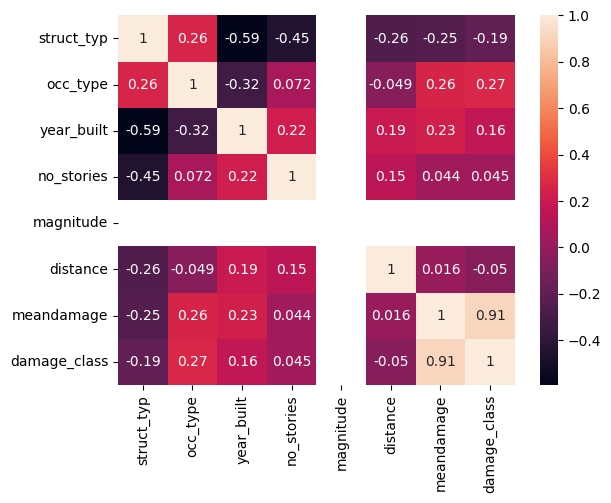

In [661]:
sns.heatmap(data.corr(),annot=True)

## Predict building status (safe / high-risk / collapsed)
##### y = data["damage_class"]

In [662]:
x = data.drop(["meandamage","damage_class"],axis=1)
y = data["damage_class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [663]:
x

,struct_typ,occ_type,year_built,no_stories,magnitude,distance
0,4,6,1946,1,5,8.758655
1,5,1,1946,1,5,8.750071
2,4,6,1983,1,5,8.761617
3,4,6,1954,1,5,8.767489
4,4,6,1982,1,5,8.764526
...,...,...,...,...,...,...
11087,3,1,2005,2,5,8.783250
11088,3,1,2003,2,5,8.720425
11089,1,6,2001,2,5,8.882139
11090,3,1,1995,1,5,8.909023


In [664]:
# logistic regression

model_log = linear_model.LogisticRegression()
model_log.fit(x_train,y_train)
y_log = model_log.predict(x_test)
log_acc = metrics.accuracy_score(y_test,y_log)*100
log_acc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


59.89184317260027

In [665]:
# decision tree classifier

model_tree_classifier = tree.DecisionTreeClassifier()
model_tree_classifier.fit(x_train,y_train)
y_tree_classifier = model_tree_classifier.predict(x_test)
tree_classifier_acc = metrics.accuracy_score(y_test,y_tree_classifier)*100
tree_classifier_acc

95.94411897251014

In [666]:
# random forest classifier

model_forest_classifier = ensemble.RandomForestClassifier()
model_forest_classifier.fit(x_train,y_train)
y_forest_classifier = model_forest_classifier.predict(x_test)
forest_classifier_acc = metrics.accuracy_score(y_test,y_forest_classifier)*100
forest_classifier_acc

95.98918431726003

In [667]:
# svm classifier

model_svm_classifier = svm.SVC()
model_svm_classifier.fit(x_train,y_train)
y_svm_classifier = model_svm_classifier.predict(x_test)
svm_classifier_acc = metrics.accuracy_score(y_test,y_svm_classifier)*100
svm_classifier_acc

47.273546642631814

In [668]:
# knn classifier

model_knn_classifier = neighbors.KNeighborsClassifier()
model_knn_classifier.fit(x_train,y_train)
y_knn_classifier = model_knn_classifier.predict(x_test)
knn_classifier_acc = metrics.accuracy_score(y_test,y_knn_classifier)*100
knn_classifier_acc

93.01487156376747

In [669]:
# naive bayes classifier

model_nb_classifier = naive_bayes.CategoricalNB()
model_nb_classifier.fit(x_train,y_train)
y_nb_classifier = model_nb_classifier.predict(x_test)
nb_classifier_acc = metrics.accuracy_score(y_test,y_nb_classifier)*100
nb_classifier_acc

81.20775123929698

In [670]:
pickle.dump(model_log, open("./models/model_log.pickle", "wb"))
pickle.dump(model_tree_classifier, open("./models/model_tree_classifier.pickle", "wb"))
pickle.dump(model_forest_classifier, open("./models/model_forest_classifier.pickle", "wb"))
pickle.dump(model_svm_classifier, open("./models/model_svm_classifier.pickle", "wb"))
pickle.dump(model_knn_classifier, open("./models/model_knn_classifier.pickle", "wb"))
pickle.dump(model_nb_classifier, open("./models/model_nb_classifier.pickle", "wb"))

## Estimate a numerical probability of building collapse
##### y = data["meandamage"]

In [671]:
x = data.drop(["meandamage","damage_class"],axis=1)
y = data["meandamage"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [672]:
x

,struct_typ,occ_type,year_built,no_stories,magnitude,distance
0,4,6,1946,1,5,8.758655
1,5,1,1946,1,5,8.750071
2,4,6,1983,1,5,8.761617
3,4,6,1954,1,5,8.767489
4,4,6,1982,1,5,8.764526
...,...,...,...,...,...,...
11087,3,1,2005,2,5,8.783250
11088,3,1,2003,2,5,8.720425
11089,1,6,2001,2,5,8.882139
11090,3,1,1995,1,5,8.909023


In [673]:
# linear regression

model_lin = linear_model.LinearRegression()
model_lin.fit(x_train,y_train)
y_lin = model_lin.predict(x_test)
lin_mae = metrics.mean_absolute_error(y_test,y_lin)
lin_mae

0.03022427121122377

In [674]:
# decision tree regressor

model_tree_regressor = tree.DecisionTreeRegressor()
model_tree_regressor.fit(x_train,y_train)
y_tree_regressor = model_tree_regressor.predict(x_test)
tree_regressor_mae = metrics.mean_absolute_error(y_test,y_tree_regressor)
tree_regressor_mae

0.0029484812978819276

In [675]:
# random forest regressor

model_forest_regressor = ensemble.RandomForestRegressor()
model_forest_regressor.fit(x_train,y_train)
y_forest_regressor = model_forest_regressor.predict(x_test)
forest_regressor_mae = metrics.mean_absolute_error(y_test,y_forest_regressor)
forest_regressor_mae

0.0024348285714285763

In [676]:
# svm regressor

model_svm_regressor = svm.SVR()
model_svm_regressor.fit(x_train,y_train)
y_svm_regressor = model_svm_regressor.predict(x_test)
svm_regressor_mae = metrics.mean_absolute_error(y_test,y_svm_regressor)
svm_regressor_mae

0.04107244980351315

In [677]:
# knn regressor

model_knn_regressor = neighbors.KNeighborsRegressor()
model_knn_regressor.fit(x_train,y_train)
y_knn_regressor = model_knn_regressor.predict(x_test)
knn_regressor_mae = metrics.mean_absolute_error(y_test,y_knn_regressor)
knn_regressor_mae

0.006085645786390264

In [678]:
pickle.dump(model_lin, open("./models/model_lin.pickle", "wb"))
pickle.dump(model_tree_regressor, open("./models/model_tree_regressor.pickle", "wb"))
pickle.dump(model_forest_regressor, open("./models/model_forest_regressor.pickle", "wb"))
pickle.dump(model_svm_regressor, open("./models/model_svm_regressor.pickle", "wb"))
pickle.dump(model_knn_regressor, open("./models/model_knn_regressor.pickle", "wb"))

## result

In [679]:
import matplotlib.pyplot as plt

# -----------------------------
# Classification results
# -----------------------------
classification_models = [
    ("Logistic Regression", log_acc),
    ("Decision Tree Classifier", tree_classifier_acc),
    ("Random Forest Classifier", forest_classifier_acc),
    ("SVM Classifier", svm_classifier_acc),
    ("KNN Classifier", knn_classifier_acc),
    ("Naive Bayes Classifier", nb_classifier_acc),
]

# -----------------------------
# Regression results
# -----------------------------
regression_models = [
    ("Linear Regression", lin_mae),
    ("Decision Tree Regressor", tree_regressor_mae),
    ("Random Forest Regressor", forest_regressor_mae),
    ("SVM Regressor", svm_regressor_mae),
    ("KNN Regressor", knn_regressor_mae),
]

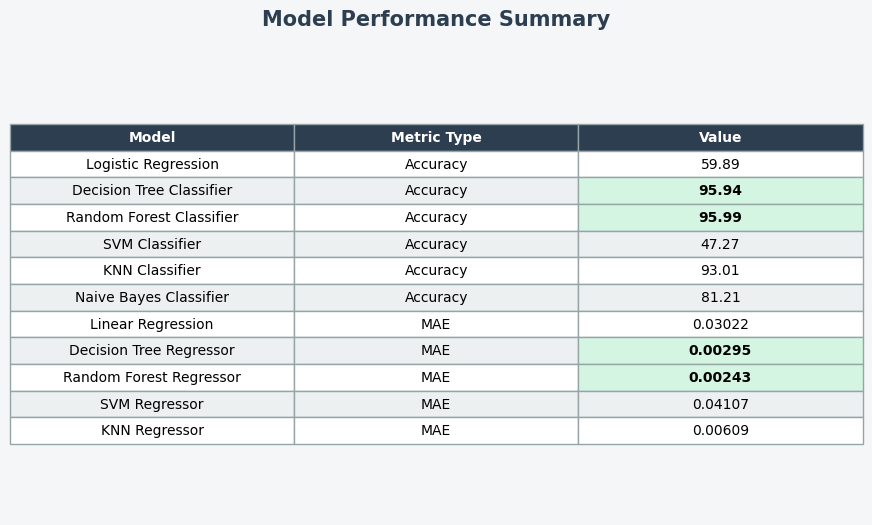

In [680]:
import matplotlib.pyplot as plt

# -----------------------------
# Prepare table data
# -----------------------------
rows = []

for model, acc in classification_models:
    rows.append([model, "Accuracy", round(acc, 2)])

for model, mae in regression_models:
    rows.append([model, "MAE", round(mae, 5)])

# -----------------------------
# Plot styled table
# -----------------------------
fig, ax = plt.subplots(figsize=(11, 6))
fig.patch.set_facecolor("#f4f6f7")   # background
ax.axis("off")

table = ax.table(
    cellText=rows,
    colLabels=["Model", "Metric Type", "Value"],
    cellLoc="center",
    loc="center"
)

# ---- Styling ----
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.6)

# Colors
header_color = "#2c3e50"
row_colors = ["#ecf0f1", "#ffffff"]
edge_color = "#95a5a6"

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor(edge_color)
    
    # Header
    if row == 0:
        cell.set_facecolor(header_color)
        cell.set_text_props(color="white", weight="bold")
    else:
        cell.set_facecolor(row_colors[row % 2])

        # Highlight best values
        text = cell.get_text().get_text()
        if col == 2:
            try:
                value = float(text)
                # High accuracy is good, low MAE is good
                if value >= 95 or value <= 0.003:
                    cell.set_facecolor("#d5f5e3")  # light green
                    cell.set_text_props(weight="bold")
            except:
                pass

# Title
plt.title(
    "Model Performance Summary",
    fontsize=15,
    weight="bold",
    color="#2c3e50",
    pad=20
)

plt.savefig("model_result.jpg")
plt.show()
